In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create data frame
mycolumns = [
    'data','platform','lang',
    'metadata.read', 'metadata.write',
    'pixeldata.read','pixeldata.read.init','pixeldata.read.pixels',
    'pixeldata.write','pixeldata.write.init','pixeldata.write.pixels','pixeldata.write.close']
d = pd.DataFrame(columns=mycolumns)

# Read all CSV files into a data frame
meas_col = {'cpp': 'proc.real', 'java': 'real'}
for data in ['bbbc', 'mitocheck']:
    for platform in ['win', 'linux']:
        for lang in ['cpp', 'java']:
   
            def get_filename(test):
                return 'results/' + data + '-' + test + '-' + platform + '-' + lang + '.tsv'

            # Read pixels csv table
            pixel_table = pd.read_table(get_filename('pixeldata'), dtype={'test.name': str})
            c1 = pixel_table.groupby(['test.name']).mean()
            c1 = c1[meas_col[lang]]
            
            # Read metadat csv table
            metadata_table = pd.read_table(get_filename('metadata'), dtype={'test.name': str})
            c2 = metadata_table.groupby(['test.name']).mean()
            c2 = c2[meas_col[lang]]
            
            
            c = pd.concat([c1, c2]) 
            c['data'] =  data
            c['platform'] = platform
            c['lang'] = lang
            d.loc[len(d)] = c
            
d

,data,platform,lang,metadata.read,metadata.write,pixeldata.read,pixeldata.read.init,pixeldata.read.pixels,pixeldata.write,pixeldata.write.init,pixeldata.write.pixels,pixeldata.write.close
0,bbbc,win,cpp,3218.9,1518.1,771688.333333,451909.666667,319778.666667,1.754618e+06,2112.666667,1.751064e+06,1441.333333
1,bbbc,win,java,244.6,1453.5,157240.333333,2661.333333,154578.333333,4.534293e+05,6.333333,4.486307e+05,4791.666667
2,bbbc,linux,cpp,2422.0,1353.0,180350.000000,113753.333333,66596.666667,1.991100e+05,2033.333333,1.958533e+05,1223.333333
3,bbbc,linux,java,235.7,1162.7,99365.333333,1569.666667,97795.333333,1.398817e+05,6.333333,1.365730e+05,3301.333333
4,mitocheck,win,cpp,72298.2,2268.8,72807.333333,71808.666667,998.666667,1.193237e+05,1764.666667,1.150157e+05,2543.333333
5,mitocheck,win,java,366.0,4951.1,2518.333333,851.333333,1666.333333,1.256700e+04,1.333333,1.120400e+04,1360.666667
6,mitocheck,linux,cpp,64993.0,1768.0,66030.000000,65350.000000,680.000000,1.236000e+04,1660.000000,8.880000e+03,1820.000000
7,mitocheck,linux,java,303.2,3843.3,1593.333333,625.000000,967.666667,5.390000e+03,1.333333,4.258000e+03,1129.666667


In [3]:
# d.columns = [c.replace('.', '_') for c in d.columns]
# d.groupby(['data', 'platform']).pixeldata_read.size().unstack().plot(kind='bar', stacked=True)

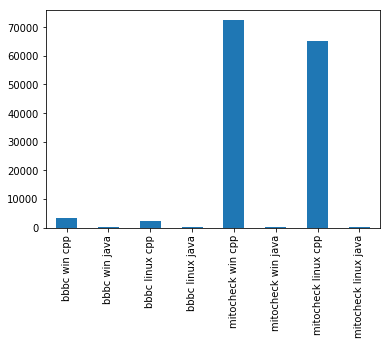

In [4]:
f= plt.figure()
ax = d['metadata.read'].plot(kind='bar')
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()

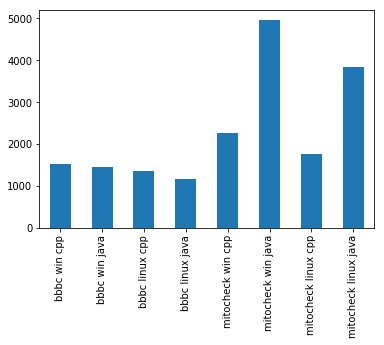

In [5]:
f= plt.figure()
ax = d['metadata.write'].plot(kind='bar')
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()

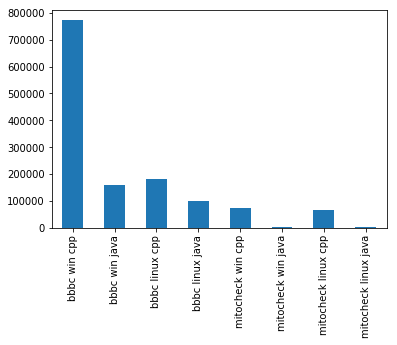

In [6]:
f= plt.figure()
ax = d['pixeldata.read'].plot(kind='bar')
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()

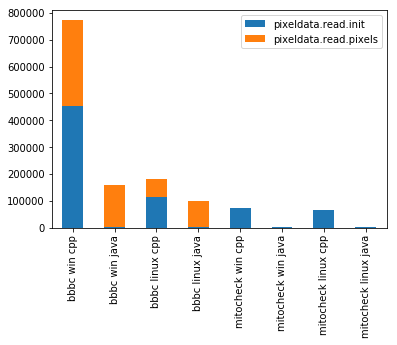

In [7]:
plt.figure()
cols = ['pixeldata.read.init', 'pixeldata.read.pixels']
ax = d[cols].plot(kind='bar',stacked=True)
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()

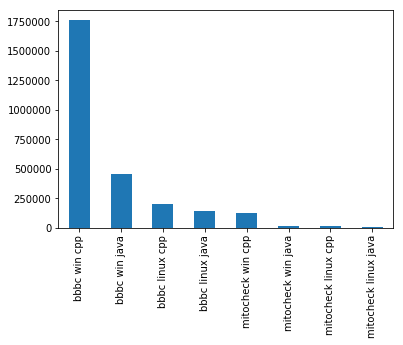

In [8]:
plt.figure()
ax = d['pixeldata.write'].plot(kind='bar')
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()

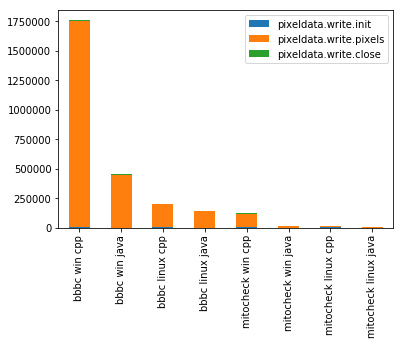

In [9]:
plt.figure()
cols = ['pixeldata.write.init', 'pixeldata.write.pixels', 'pixeldata.write.close']
ax = d[cols].plot(kind='bar',stacked=True)
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()